In [1]:
#The goal of this project is to predict wine quality
#Source: https://archive.ics.uci.edu/ml/datasets/Wine+Quality
#importing libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
red=pd.read_csv('C:\Users\Tendai Meda\Downloads\winequality-red.csv')
white=pd.read_csv('C:\Users\Tendai Meda\Downloads\winequality-white.csv')
white.head(3)

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
1,6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...
2,8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...


In [2]:
#Lets get proper data frames
f = open("white.txt", "a")
f.write(white.columns[0]+'\n')
for i in range(len(white.values)):
    f.write(white.values[i][0]+'\n')
f.close()

In [3]:
f = open("red.txt", "a")
f.write(red.columns[0]+'\n')
for i in range(len(red.values)):
    f.write(red.values[i][0]+'\n')
f.close()

In [4]:
white=pd.read_csv('white.txt', sep=';')
red=pd.read_csv('red.txt', sep=';')

In [5]:
red.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [6]:
white.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [7]:
#Now that we have our data, lets check for null values
print(red.isnull().sum().sum())
print(white.isnull().sum().sum())

0
0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C47A6D8>,
      dtype=object)

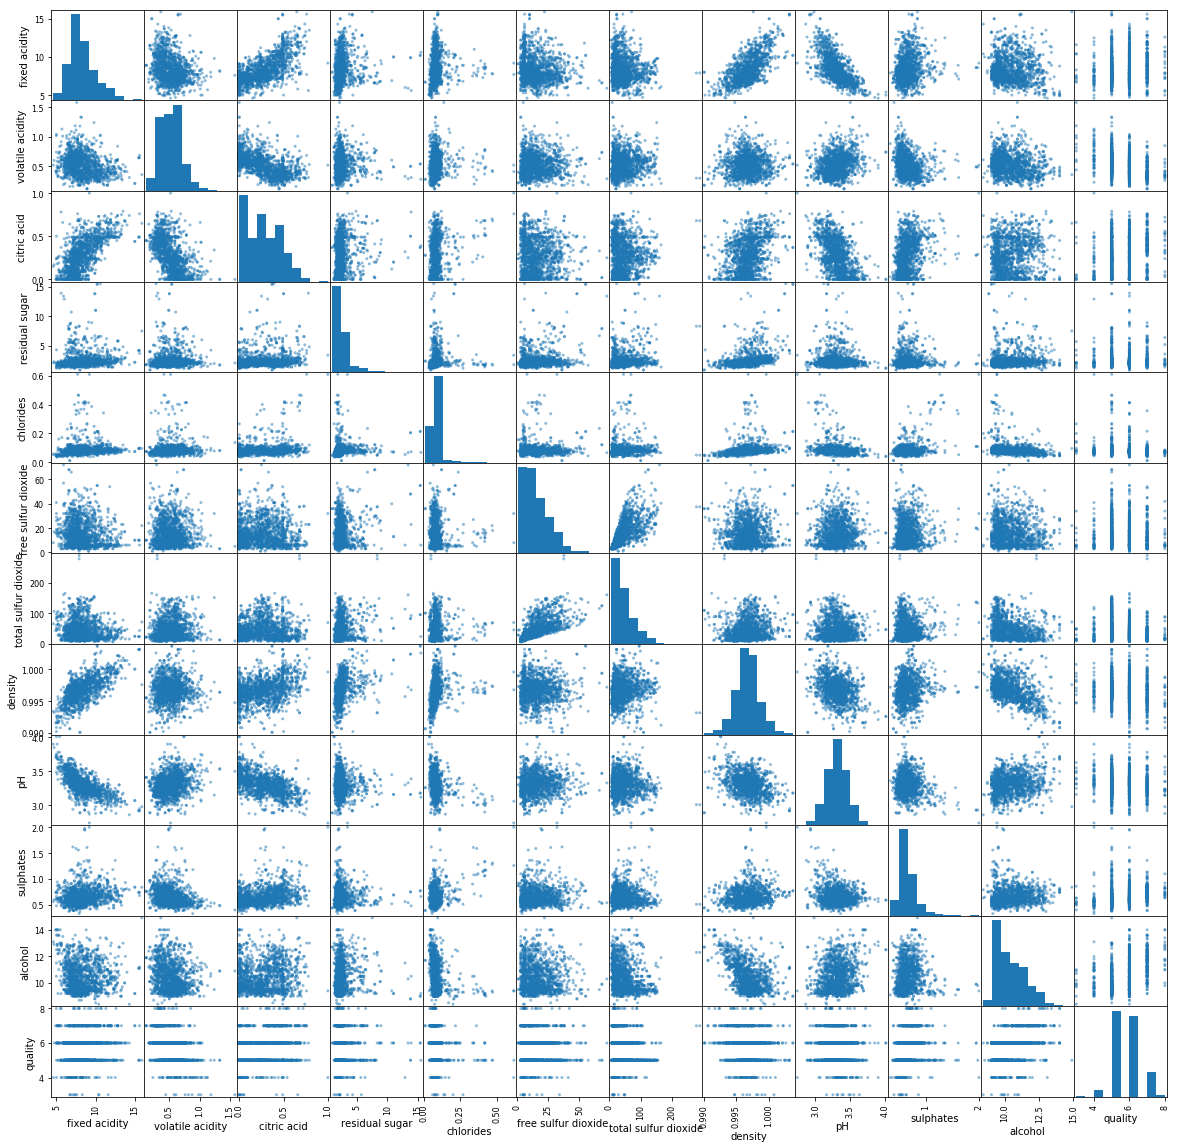

In [8]:
#No null values, awesome! Lets see how the data looks
pd.plotting.scatter_matrix(red,figsize=(20,20))

In [9]:
#It looks like I'll need to use a random forest for this data
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestRegressor as RF

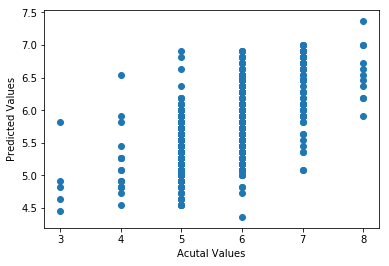

In [10]:
x_tr,x_te,y_tr,y_te=tts(red.drop(columns=['quality']),red.quality,test_size=0.4)
model=RF(n_estimators = 11)
model=model.fit(x_tr,y_tr)
pred=model.predict(x_te)
resid=abs(y_te-pred)
plt.xlabel('Acutal Values')
plt.ylabel('Predicted Values')
plt.scatter(y_te,pred)

In [11]:
resid.mean() #The model seems to do a pretty good job predicting wine quality. Lets see how the errors are distributed

0.4430397727272732

(array([  2.,   3.,   8.,  32.,  87., 277., 145.,  64.,  13.,   9.]),
 array([-2.81818182, -2.32727273, -1.83636364, -1.34545455, -0.85454545,
        -0.36363636,  0.12727273,  0.61818182,  1.10909091,  1.6       ,
         2.09090909]),
 <a list of 10 Patch objects>)

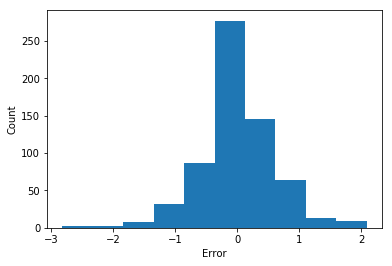

In [12]:
resid=y_te-pred
plt.xlabel('Error')
plt.ylabel('Count')
plt.hist(resid)

In [13]:
#Most errors fall between -0.5 and 0.5 so we can conclude that the model is pretty accuate with low bias.
#Now to cut down on the variables
x=[]
for i in range(11):
    x.append(red.columns[i])
feat_red=model.feature_importances_

<BarContainer object of 11 artists>

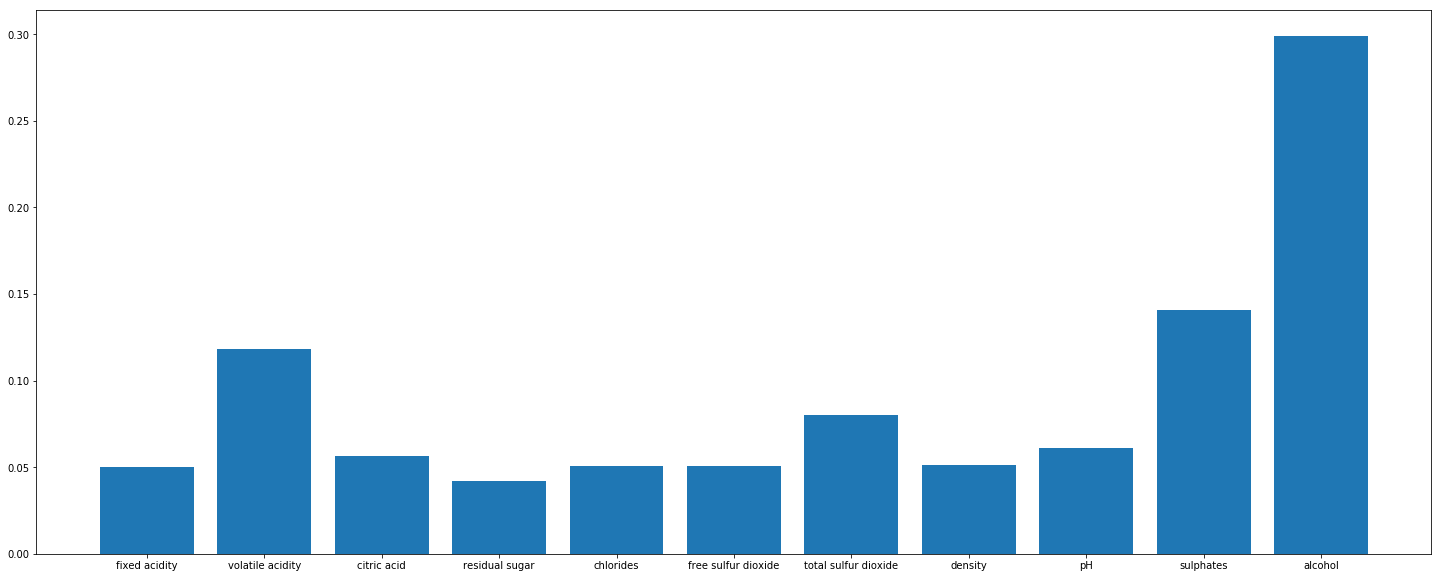

In [14]:
plt.figure(figsize=(25,10))
plt.bar(x,feat_red)

In [15]:
# Alcohol, volatile acidity, and sulphates seem to be the most important features, so lets try the model with 3 features
x_tr,x_te,y_tr,y_te=tts(red.drop(columns=['quality']),red.quality,test_size=0.4)
model=RF(n_estimators = 3)
model=model.fit(x_tr,y_tr)
pred=model.predict(x_te)
resid=abs(y_te-pred)

In [16]:
resid.mean() #We do sacrifice some accuracy, but we gain a much simpler model using only 3 variables

0.4880208333333331

(array([  2.,   8.,   8.,  61.,  70., 299., 132.,  41.,  14.,   5.]),
 array([-3.        , -2.46666667, -1.93333333, -1.4       , -0.86666667,
        -0.33333333,  0.2       ,  0.73333333,  1.26666667,  1.8       ,
         2.33333333]),
 <a list of 10 Patch objects>)

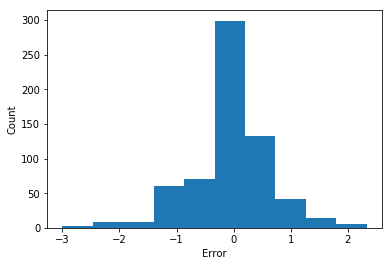

In [17]:
resid=y_te-pred
plt.xlabel('Error')
plt.ylabel('Count')
plt.hist(resid)

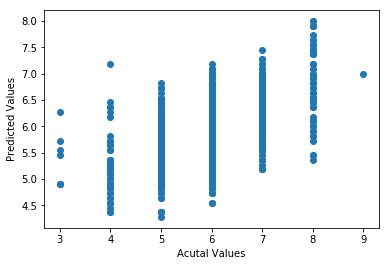

In [18]:
#Most errors still fall between -0.5 and 0.5 so we can still trust the simplified model
#Now to look at white wines
x_tr,x_te,y_tr,y_te=tts(white.drop(columns=['quality']),white.quality,test_size=0.4)
model=RF(n_estimators = 11)
model=model.fit(x_tr,y_tr)
pred=model.predict(x_te)
resid=abs(y_te-pred)
plt.xlabel('Acutal Values')
plt.ylabel('Predicted Values')
plt.scatter(y_te,pred)

In [19]:
resid.mean()

0.47402597402597174

(array([  3.,   7.,  18., 131., 424., 894., 333., 120.,  22.,   8.]),
 array([-3.27272727, -2.68181818, -2.09090909, -1.5       , -0.90909091,
        -0.31818182,  0.27272727,  0.86363636,  1.45454545,  2.04545455,
         2.63636364]),
 <a list of 10 Patch objects>)

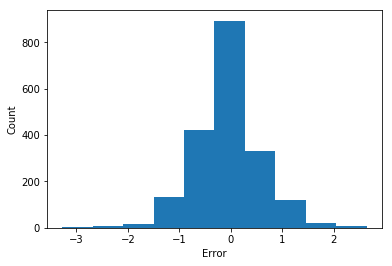

In [20]:
resid=y_te-pred
plt.xlabel('Error')
plt.ylabel('Count')
plt.hist(resid)

<BarContainer object of 11 artists>

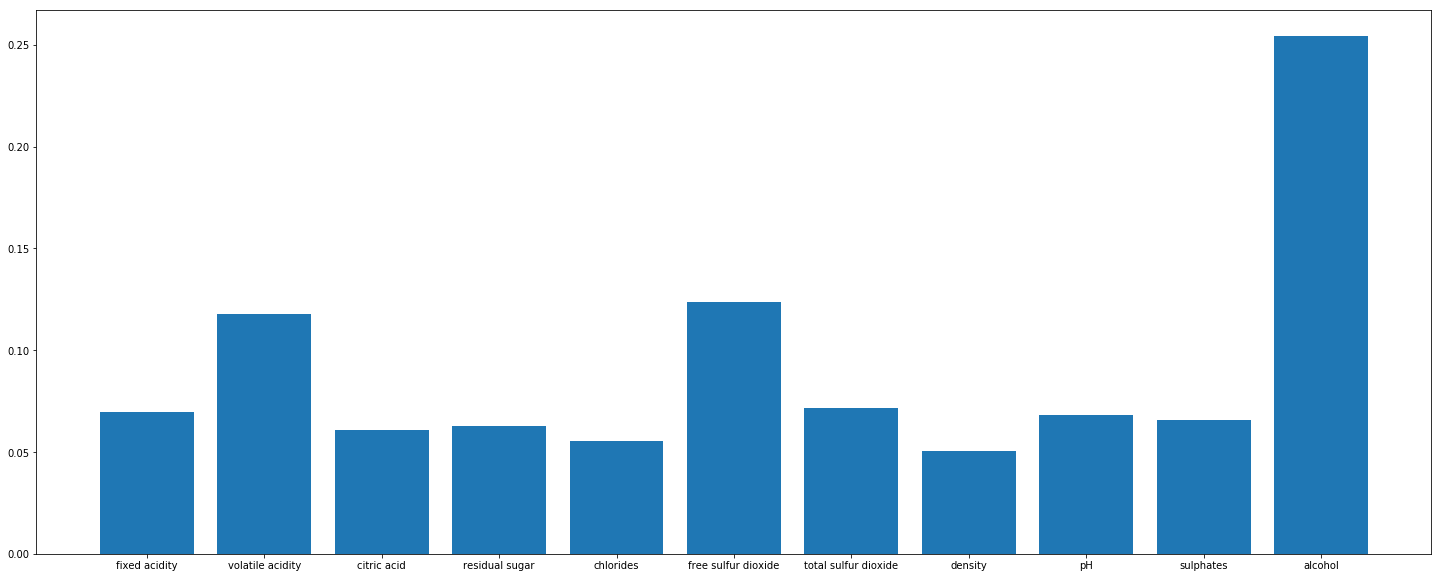

In [21]:
#The random forest algorithm still holds up with white wines so we can move straight to feature selection
x=[]
for i in range(11):
    x.append(white.columns[i])
feat_white=model.feature_importances_

plt.figure(figsize=(25,10))
plt.bar(x,feat_white)

In [22]:
#Looks like 3 is the magic number although the important features are different compared to red wines
x_tr,x_te,y_tr,y_te=tts(white.drop(columns=['quality']),white.quality,test_size=0.4)
model=RF(n_estimators = 3)
model=model.fit(x_tr,y_tr)
pred=model.predict(x_te)
resid=abs(y_te-pred)

In [23]:
resid.mean()

0.5176870748299348

(array([  2.,   4.,   3.,  44., 387., 305., 831., 347.,  29.,   8.]),
 array([-4.        , -3.33333333, -2.66666667, -2.        , -1.33333333,
        -0.66666667,  0.        ,  0.66666667,  1.33333333,  2.        ,
         2.66666667]),
 <a list of 10 Patch objects>)

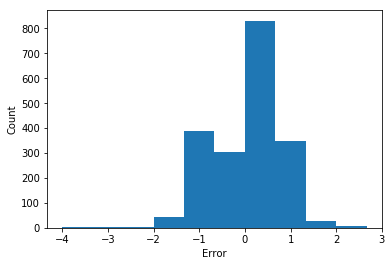

In [24]:
resid=y_te-pred
plt.xlabel('Error')
plt.ylabel('Count')
plt.hist(resid)

<BarContainer object of 11 artists>

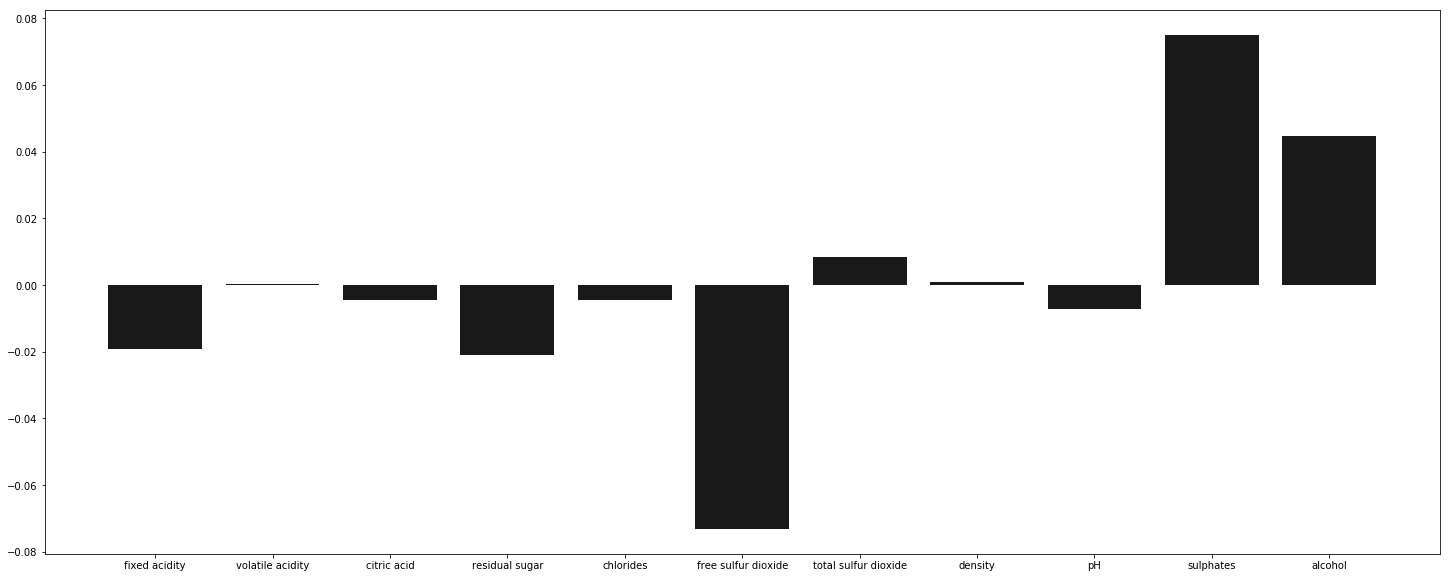

In [25]:
feat_diff=feat_red-feat_white

plt.figure(figsize=(25,10))
plt.bar(x,feat_diff, color='black', alpha=.9)

In [26]:
#It seems like between red and white wines, sulphates and free sulfur dioxide levels affect each type of wine
#differently

0.481478890482


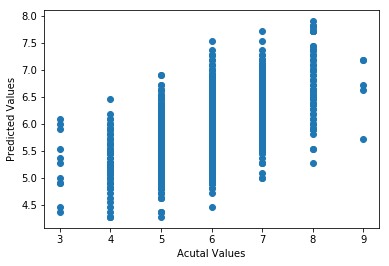

In [27]:
#Now that we have looked at each type of wine individually and analyzed them, lets create a model that can work for 
#both types of wines. 
wine=pd.concat([red,white])
x_tr,x_te,y_tr,y_te=tts(wine.drop(columns=['quality']),wine.quality,test_size=0.4)
model=RF(n_estimators = 11)
model=model.fit(x_tr,y_tr)
pred=model.predict(x_te)
resid=abs(y_te-pred)
plt.xlabel('Acutal Values')
plt.ylabel('Predicted Values')
plt.scatter(y_te,pred)
print(resid.mean())


(array([   4.,   23.,   75.,  385., 1004.,  782.,  249.,   59.,   16.,
           2.]),
 array([-3.09090909, -2.45454545, -1.81818182, -1.18181818, -0.54545455,
         0.09090909,  0.72727273,  1.36363636,  2.        ,  2.63636364,
         3.27272727]),
 <a list of 10 Patch objects>)

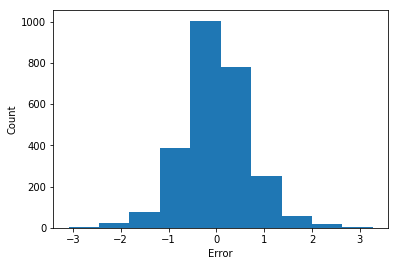

In [28]:
resid=y_te-pred
plt.xlabel('Error')
plt.ylabel('Count')
plt.hist(resid)

<BarContainer object of 11 artists>

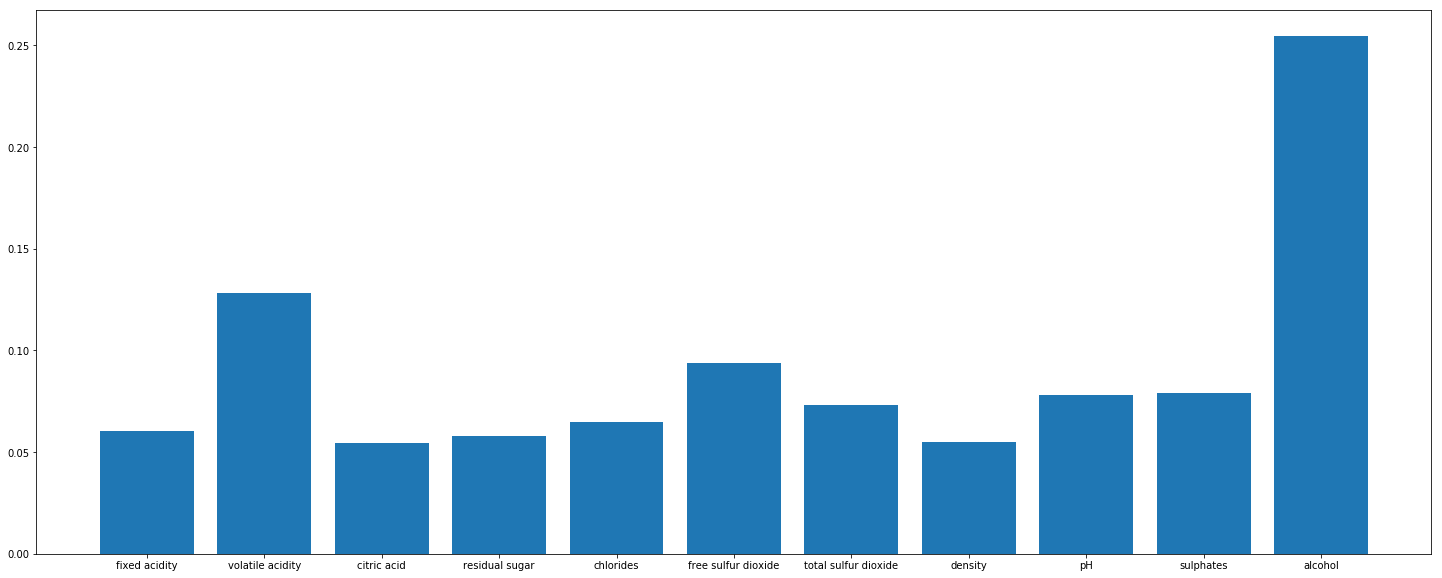

In [29]:
feat_wine=model.feature_importances_

plt.figure(figsize=(25,10))
plt.bar(x,feat_wine)

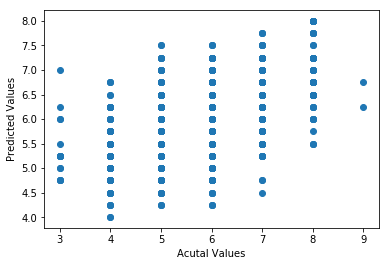

In [30]:
wine=pd.concat([red,white])
x_tr,x_te,y_tr,y_te=tts(wine.drop(columns=['quality']),wine.quality,test_size=0.4)
model=RF(n_estimators = 4)
model=model.fit(x_tr,y_tr)
pred=model.predict(x_te)
resid=abs(y_te-pred)
plt.xlabel('Acutal Values')
plt.ylabel('Predicted Values')
plt.scatter(y_te,pred)

In [31]:
print(resid.mean())

0.508657175837


(array([1.000e+00, 6.000e+00, 3.600e+01, 5.800e+01, 3.670e+02, 1.229e+03,
        5.280e+02, 3.100e+02, 5.500e+01, 9.000e+00]),
 array([-4.   , -3.325, -2.65 , -1.975, -1.3  , -0.625,  0.05 ,  0.725,
         1.4  ,  2.075,  2.75 ]),
 <a list of 10 Patch objects>)

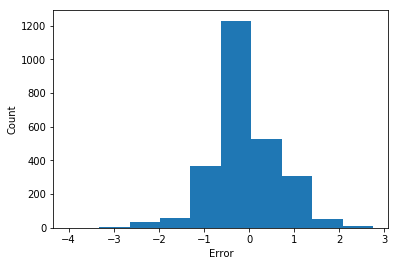

In [32]:
resid=y_te-pred
plt.xlabel('Error')
plt.ylabel('Count')
plt.hist(resid)

In [33]:
#After playing with the number of vaiables, 4 was the most optimal, which makes sense because when it comes to
#important features,red and white wines share 2 features and each wine has its own features that helps predict quality
#totaling to 4 features for the model.